In [2]:
from IPython.core.display import HTML
HTML("<link rel='stylesheet' href='path/to/your/style.css' type='text/css'>")

In [3]:
# Fix the error file not supported above by installing xlrd
#%pip install xlrd

# Human Resourece Retention Study: Establishing Factors that Contribute to Employee Turnover

Here we will use machine learning techniques to model and predict employee turnover. We will use various machine learning techniques such as regression and classification to model the data and make prediction about employee turnover. We will use libraries such as scikit-learn and statsmodels to implement these techniques.


<h3 class="styled-heading">Importing Libraries</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read the data
file_name = "/Users/jasonrobinson/Packt/DS_Analytics_AI_Business_vid/Code/DataScienceBusinessDatasets/hr_data.csv"
df = pd.read_csv(file_name)

In [6]:
df.shape

(14999, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [8]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# Determine categorical columns
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
print(categorical_columns)

['department', 'salary']


In [10]:
# Display values in categorical columns
for c in categorical_columns:
    print(c, df[c].unique())

department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


 <h3 class="styled-heading"> Evaluation and Employee Satisfaction Data </h3>

In [11]:
# Determine numerical columns
emp_satis_eval = pd.read_excel('/Users/jasonrobinson/Packt/DS_Analytics_AI_Business_vid/Code/DataScienceBusinessDatasets/employee_satisfaction_evaluation.xlsx', engine='openpyxl')
emp_satis_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


Merge the evaluation and satisfaction data into one dataframe. We will use this dataframe to train our model.

In [12]:
# Merge the evaluation and satisfaction data into one dataframe
main_df = df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


Are there any missing values in the data?

In [15]:
# Missing values
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

We have 27 missing values out of 14999 rows, which statistically insignificant, therefore we can drop these rows.

In [14]:
# Drop the missing values
main_df = main_df.dropna()

In [18]:
main_df.describe()#include=[object])

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000,14956.000000
mean,45470.011233,3.803290,201.053891,3.497860,0.144624,0.237296,0.021196,0.612655,0.715988
std,25901.163445,1.233091,49.937412,1.460386,0.351733,0.425439,0.144040,0.248755,0.171130
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22927.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45522.500000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67532.250000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [21]:
# Groupby department and sum the number of employees
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4671,247411,4246,164,271,3,756.18,877.21
RandD,3028,157881,2648,134,121,27,487.18,559.73
accounting,2932,154144,2699,96,203,14,446.07,549.99
hr,2696,146552,2475,89,214,15,441.31,522.59
management,2419,126030,2689,103,89,68,389.19,453.37
marketing,3158,170628,3057,138,203,43,529.15,612.28
product_mng,3424,179770,3125,132,197,0,557.33,642.35
sales,15596,829666,14593,585,1006,99,2536.87,2930.38
support,8456,446220,7541,344,552,20,1373.76,1606.79


In [22]:
# Value counts for each department
main_df_final['department'].value_counts()

sales          4130
technical      2709
support        2223
IT             1224
product_mng     899
marketing       856
RandD           786
accounting      766
hr              737
management      626
Name: department, dtype: int64

In [23]:
main_df_final['left'].value_counts()

0    11407
1     3549
Name: left, dtype: int64

In [24]:
# Determine the number of employees who left the company
left_df = main_df[main_df['left'] == 1]
left_df.shape

(3549, 11)

In [25]:
# Determine the number of employees who stayed
stayed_df = main_df[main_df['left'] == 0]
stayed_df.shape

(11407, 11)

### Displaying the Correlation Matrix

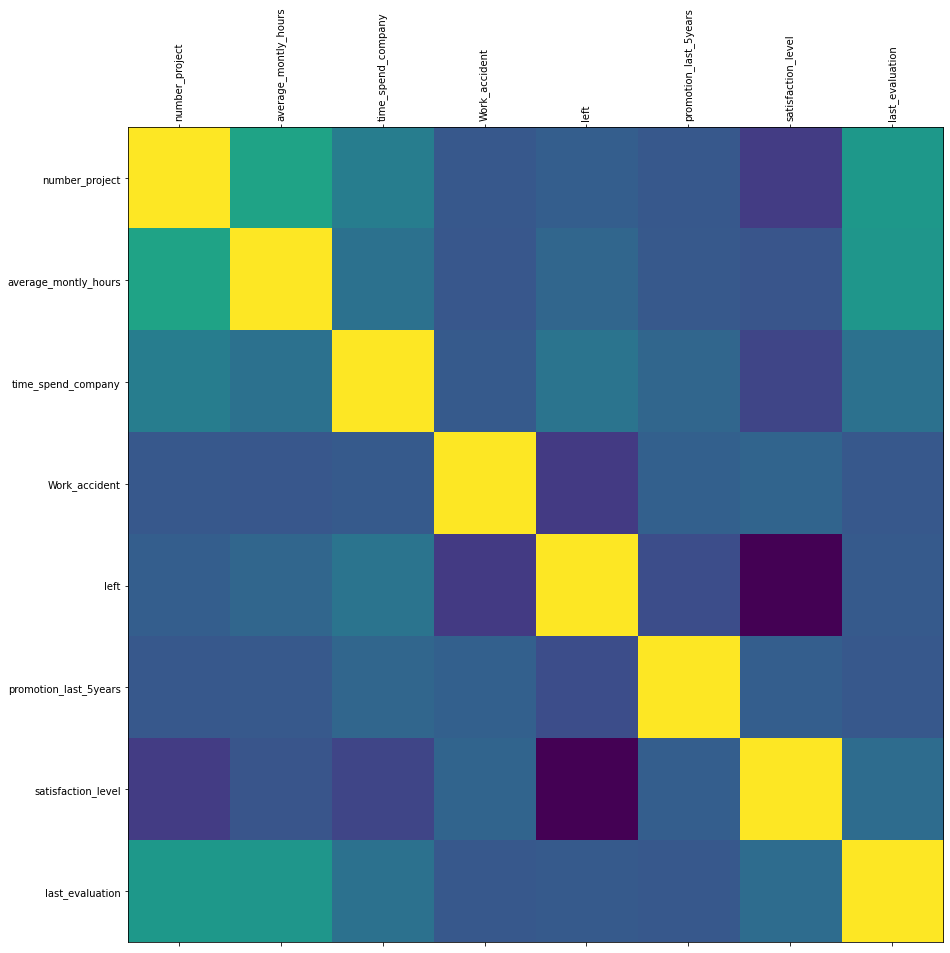

In [26]:
# Create a function for the correlation matrix
import matplotlib.pyplot as plt

def correlation_matrix(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()



# Correlation matrix for the main dataframe
correlation_matrix(main_df_final)


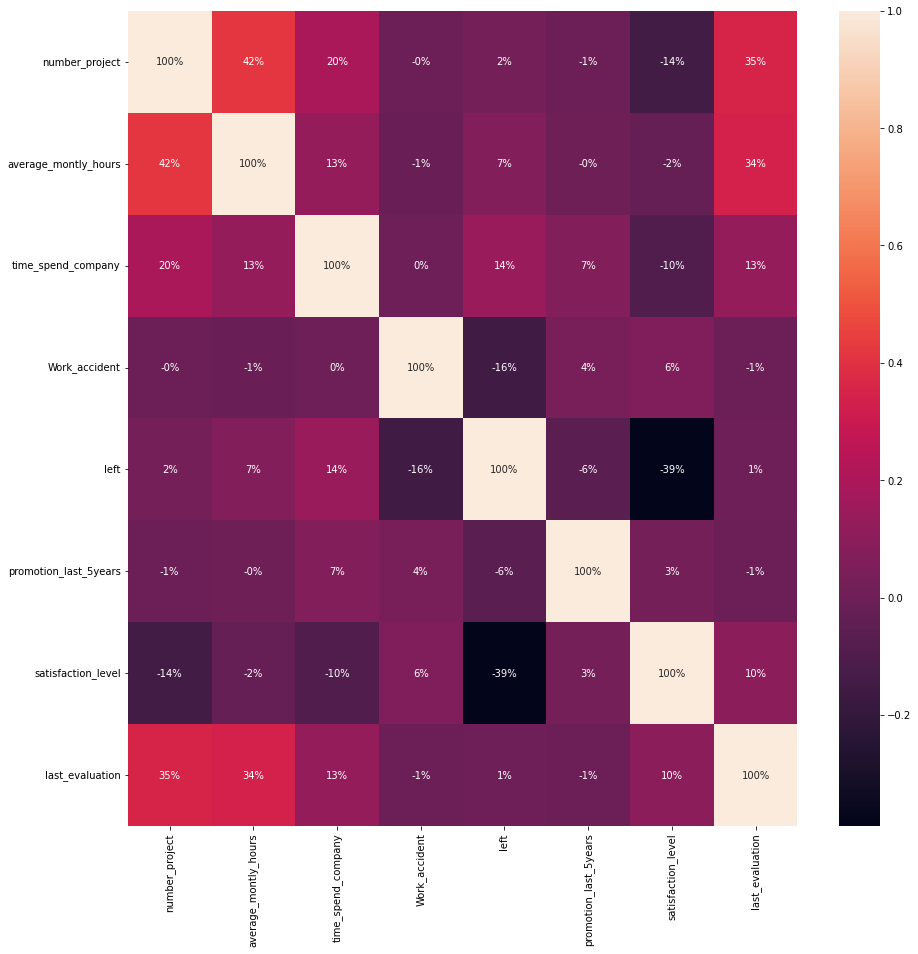

In [27]:
# Now we will create a heatmap to see the correlation between the variables
plt.figure(figsize=(15, 15))
sns.heatmap(main_df_final.corr(), annot=True, fmt='.0%')
plt.show()

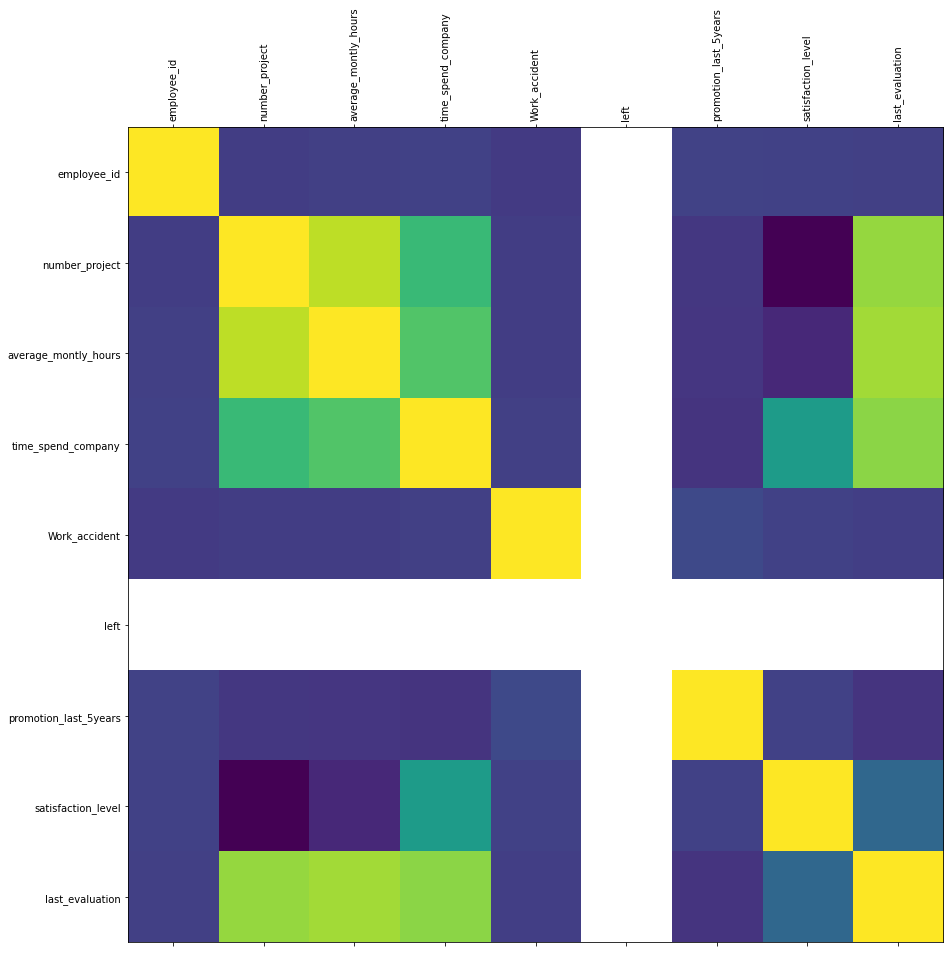

In [28]:
# Correlation matrix for the left dataframe
correlation_matrix(left_df)

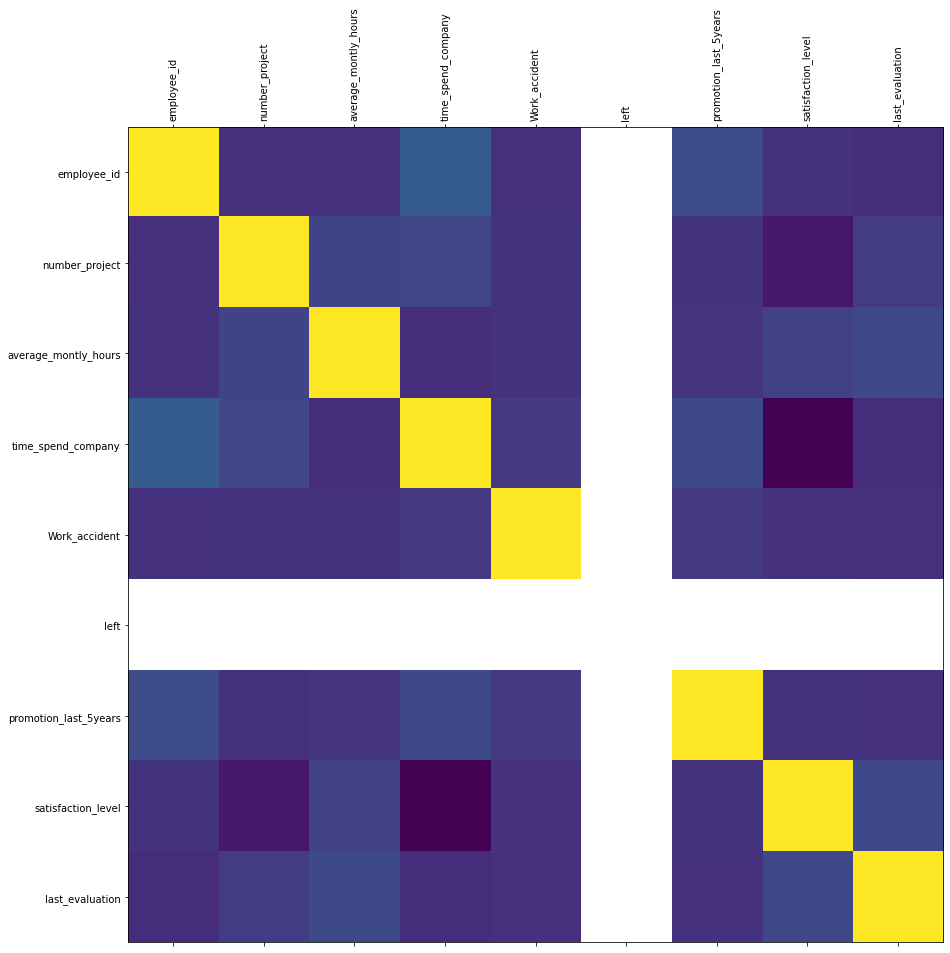

In [29]:
# Correlation matrix for the stayed dataframe
correlation_matrix(stayed_df)

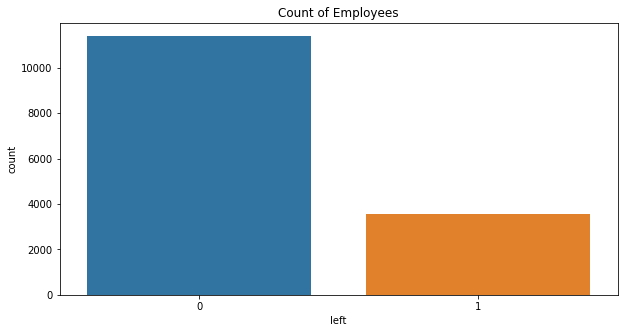

In [31]:
# Create a function for the countplot
def count_plot(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title('Count of Employees')
    plt.show()

# Countplot for the main dataframe
count_plot(main_df_final, 'left')


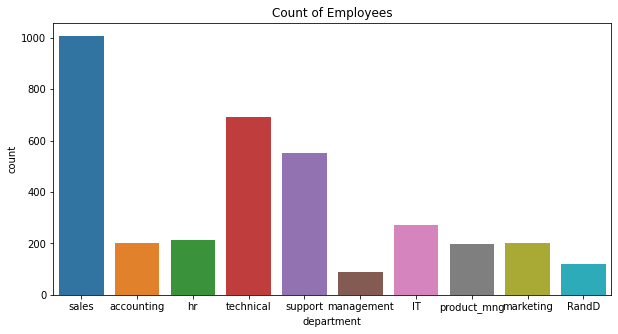

In [50]:
# Countplot for the left dataframe sorted by department
count_plot(left_df, 'department')


In [33]:
# Performe one-hot encoding on the categorical columns

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [34]:
# Now we will split the data into features and labels
X = main_df_final.drop(columns='left')
y = main_df_final['left']

In [51]:
# Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

In [52]:
# Now we will scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
df_train = pd.DataFrame(X_train)

### IT's Model Training Time!
We will use the following models to train our data:
* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine
* K-Nearest Neighbors

### Model Evaluation
We will use the following metrics to evaluate our models:
* Accuracy
* Precision
* Recall
* F1 Score

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.71%
[[2133  149]
 [ 458  252]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88      2282
           1       0.63      0.35      0.45       710

    accuracy                           0.80      2992
   macro avg       0.73      0.64      0.66      2992
weighted avg       0.78      0.80      0.78      2992



# Now we will use the Random Forest Classifier to predict employee turnover

In [55]:
# Now we will use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f} %".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.40%
[[2279    3]
 [  15  695]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2282
           1       1.00      0.98      0.99       710

    accuracy                           0.99      2992
   macro avg       0.99      0.99      0.99      2992
weighted avg       0.99      0.99      0.99      2992



In [56]:
# Now we will use the XGBoost Classifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f} %".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/opt/anaconda3/envs/NNs/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 99.26 %
[[2274    8]
 [  14  696]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2282
           1       0.99      0.98      0.98       710

    accuracy                           0.99      2992
   macro avg       0.99      0.99      0.99      2992
weighted avg       0.99      0.99      0.99      2992



In [57]:
# Now we will use the Support Vector Machine Classifier
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f} %".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 95.39 %
[[2208   74]
 [  64  646]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2282
           1       0.90      0.91      0.90       710

    accuracy                           0.95      2992
   macro avg       0.93      0.94      0.94      2992
weighted avg       0.95      0.95      0.95      2992



In [58]:
# Now we will use the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f} %".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 94.85 %
[[2181  101]
 [  53  657]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2282
           1       0.87      0.93      0.90       710

    accuracy                           0.95      2992
   macro avg       0.92      0.94      0.93      2992
weighted avg       0.95      0.95      0.95      2992



In [59]:
# Now we will take a look at feature importance
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

### 